## Text Analytics of Road Accident News: Topic Modelling

Author: Sumaia Parveen Shupti

Created on: 7/15/2021

Updated on: 7/20/2021

In [3]:
#!pip install GoogleNews
#!pip install pycaret

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Collection

#### Scraping the news from Google related to any accidents in Bangladesh. 

In [5]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()
googlenews.clear()

In [6]:
googlenews = GoogleNews(lang='en')
googlenews.get_news('Bangladesh road accident')
googlenews.search('Bangladesh road accident')

In [7]:
result_0 = googlenews.page_at(1)

desc_1 = googlenews.get_texts()

for i in list(range(2, 10)):

    result = googlenews.page_at(i)
    desc = googlenews.get_texts()

    desc_1 = desc_1 + desc

import pandas as pd

column_names = ["description_text"]
df = pd.DataFrame(columns = column_names)
df['description_text'] = desc_1
df

,description_text
0,Bangladesh traffic deaths soar during Eid holi...
1,"4 killed, 30 injured in Rangpur road accident"
2,Road crashes claim 12 lives in 5 districts
3,3 killed as car crashes into ditch in Munshiganj
4,Teenager dies in Magura road accident - Dhaka
...,...
1427,"1 killed, 5 injured in Banani road crash"
1428,Manikganj road crash leaves two bikers dead
1429,2 killed in Netrokona Road crash
1430,"At least 20 killed, 50 injured in road acciden..."


In [21]:
all_head  = " ".join(df.description_text)
all_head

"Bangladesh traffic deaths soar during Eid holidays as key safety recommendations stay unimplemented 4 killed, 30 injured in Rangpur road accident Road crashes claim 12 lives in 5 districts 3 killed as car crashes into ditch in Munshiganj Teenager dies in Magura road accident - Dhaka Report: Road crashes kill 207 in 11 days around Eid 7 killed in separate road accidents in Bagerhat 2 sisters among 3 killed in Pabna road accident Five killed in Rangpur road accident One killed, four injured in Ctg road accident - Dhaka Five, including three women, killed in Tangail road accide... Toll plaza on Mawa highway turns into death trap! Bangladeshi Video Of Road Accident Victims Passed As COVID-19 Patients Report: 273 lives lost in 240 road accidents during Eid ho... Minu killed in mysterious 'road accident' 3 dead as van crashes into parked tractor in Cumilla Bangladesh: Road accident kills 3, injures 10 3 killed, 3 injured in road mishap in Bangladesh's Bandarban Survey: 82% of disabled begga

Word Cloud Saved Successfully


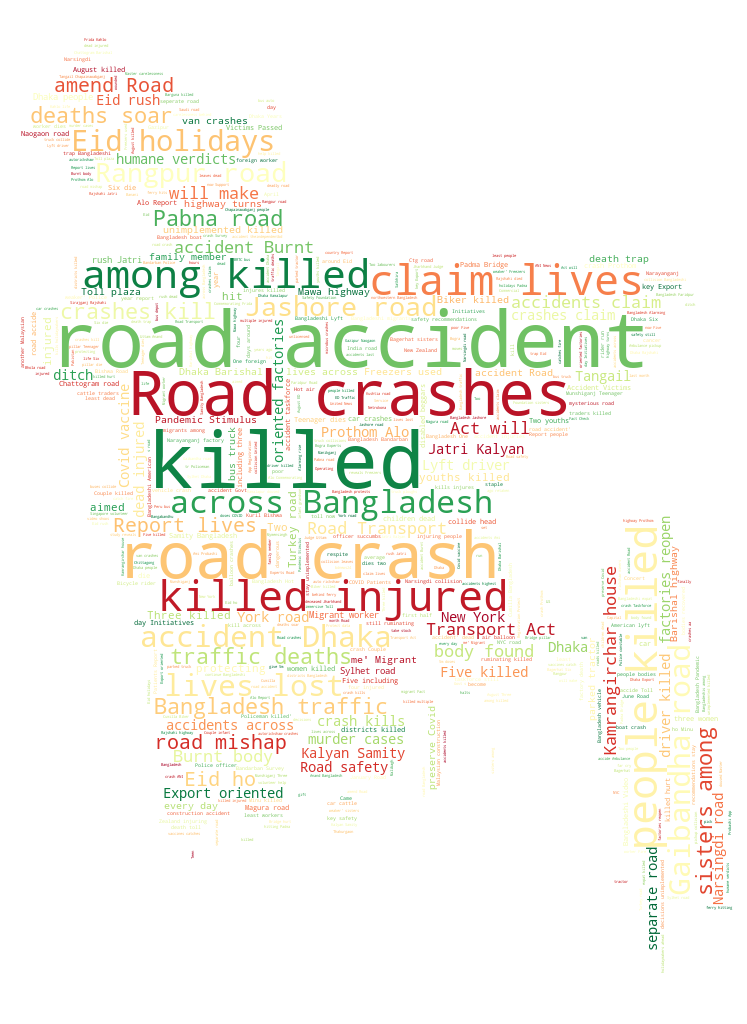

In [22]:
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    mask = np.array(Image.open("../input/prothom-alo-20192021/bangladesh_map.jpg"))
    wc = WordCloud(background_color="white", mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                colormap='RdYlGn',
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))
    
#Creating wordcloud for all tweets
create_wordcloud(all_head)

## Topic Modelling

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [10]:
from pycaret.nlp import *
%time topic_model = setup(data = df, target = 'description_text', custom_stopwords=stop_words, session_id=21)

Description,Value
session_id,21
Documents,1432
Vocab Size,209
Custom Stopwords,True


CPU times: user 9.86 s, sys: 396 ms, total: 10.3 s
Wall time: 11 s


In [11]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [12]:
%time lda = create_model(model='lda', multi_core=True)

CPU times: user 1.92 s, sys: 188 ms, total: 2.11 s
Wall time: 2.66 s


In [13]:
%time lda_data = assign_model(lda)

CPU times: user 1.29 s, sys: 56.8 ms, total: 1.35 s
Wall time: 1.27 s


In [14]:
lda_data.head()

,description_text,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,bangladesh traffic death soar eid holiday key ...,0.021130,0.936673,0.021127,0.021070,Topic 1,0.94
1,kill injure road accident,0.050963,0.050408,0.847145,0.051484,Topic 2,0.85
2,road claim live district,0.847787,0.050104,0.051304,0.050805,Topic 0,0.85
3,kill car crash ditch,0.050002,0.050560,0.051322,0.848115,Topic 3,0.85
4,die accident dhaka,0.063163,0.062712,0.808300,0.065825,Topic 2,0.81


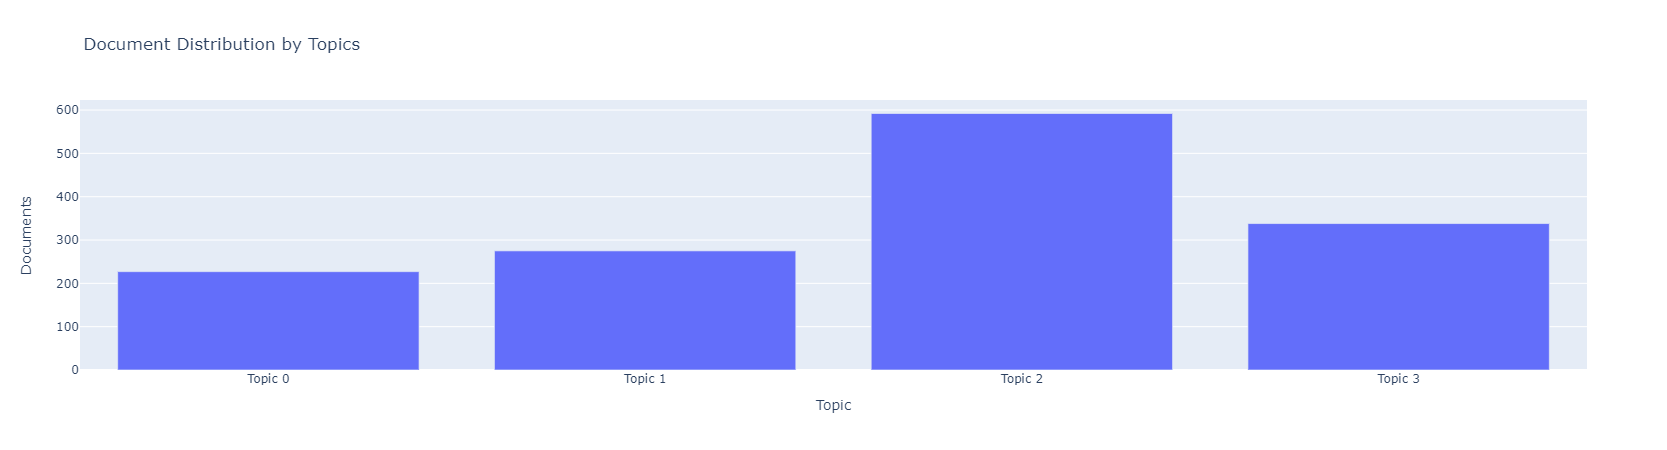

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.158714 -0.160131       1        1  34.347904
1     -0.190882  0.252119       2        1  23.671135
3      0.122448 -0.255379       3        1  21.640588
0      0.227148  0.163391       4        1  20.340373, topic_info=        Term        Freq       Total Category  logprob  loglift
19     crash  272.000000  272.000000  Default  30.0000  30.0000
13      kill  686.000000  686.000000  Default  29.0000  29.0000
11  accident  651.000000  651.000000  Default  28.0000  28.0000
17      live  102.000000  102.000000  Default  27.0000  27.0000
14      road  860.000000  860.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
2        eid   37.322782   75.226509   Topic4  -3.5603   0.8917
14      road  181.527290  860.963670   Topic4  -1.9785   0.0359
11  accident  132.461646  651.192118   Topic4  -2.2936   0.0001
77    worker   17.014610   33.574643   Topic4  -4.3458   0.9129
71   migrant   17.250069   35.520543   Topic4  -4.3321   0.8703

[201 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
28        2  0.927815    accide
11        1  0.718682  accident
11        2  0.078318  accident
11        4  0.202705  accident
187       3  0.933556       ago
...     ...       ...       ...
77        1  0.476550    worker
77        4  0.506335    worker
139       4  0.964019     would
75        2  0.991526      year
51        3  0.967141     youth

[198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [17]:
plot_model(lda, plot='topic_distribution')
plot_model(lda, plot='topic_model')

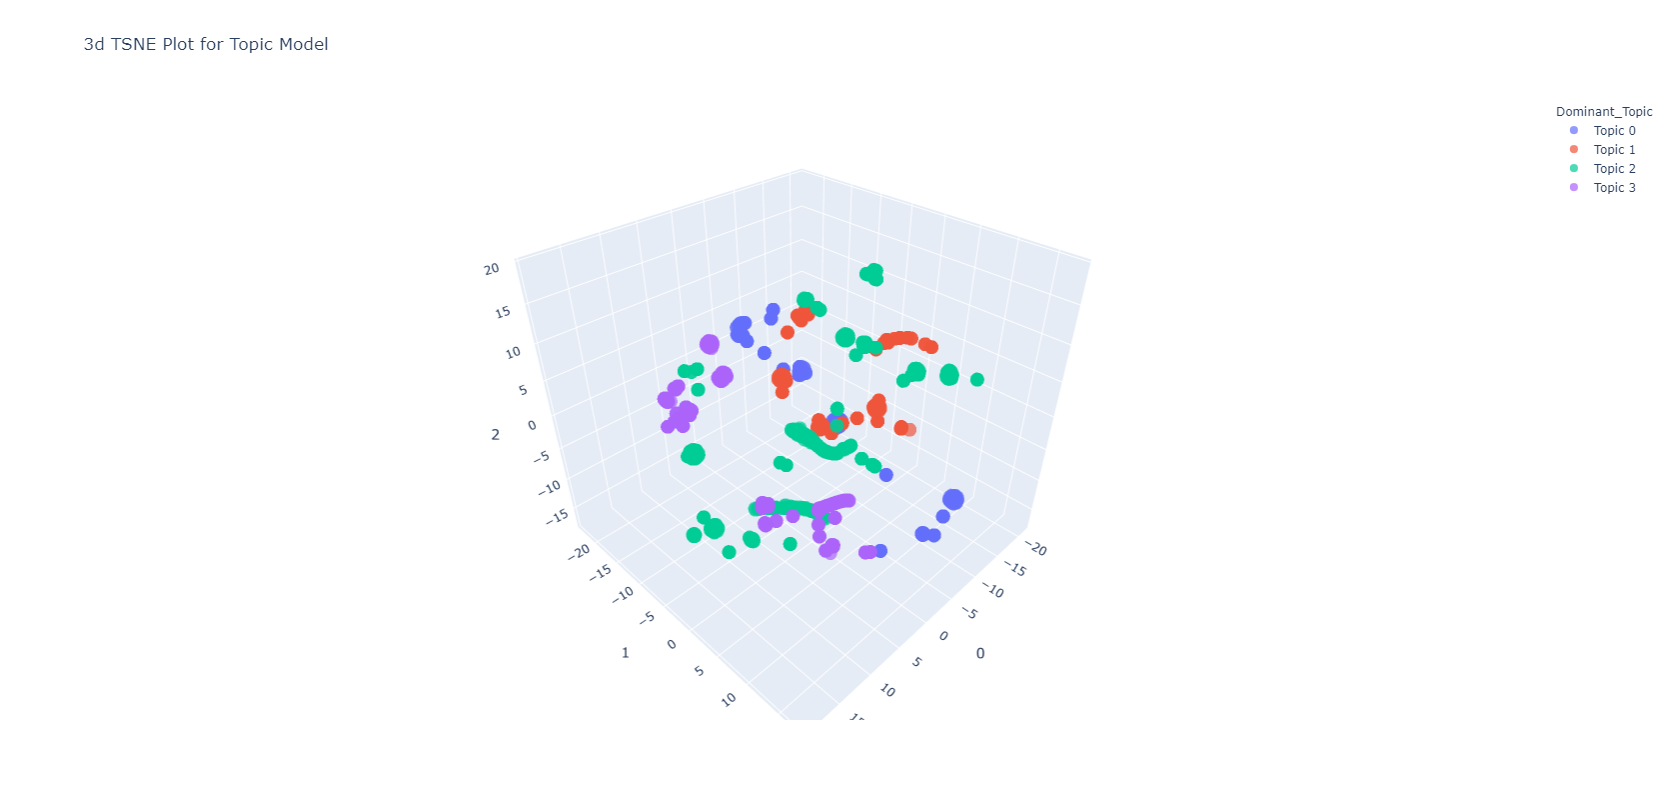

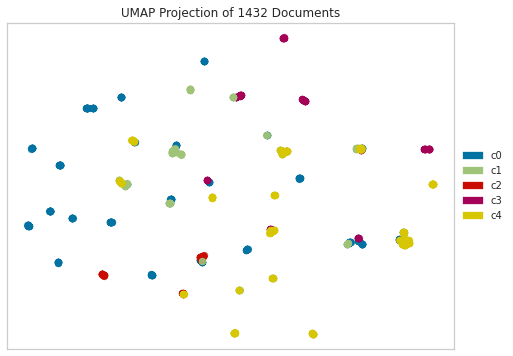

In [23]:
plot_model(lda, plot='tsne')
plot_model(lda, plot='umap')
plot_model(lda, plot='pos')

### Topic 0

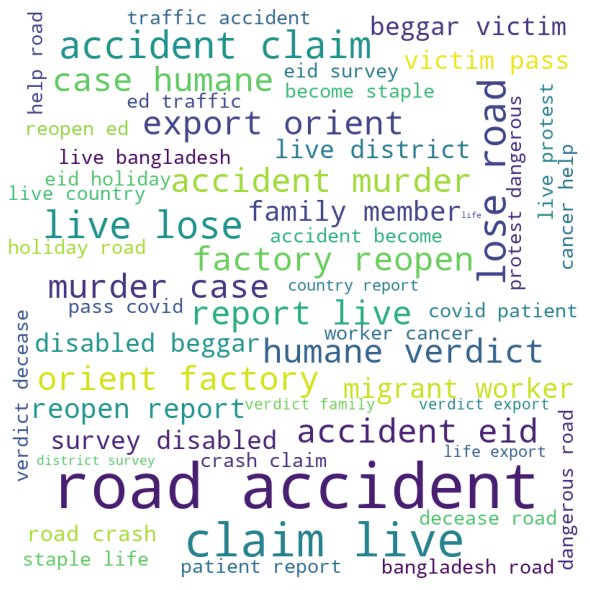

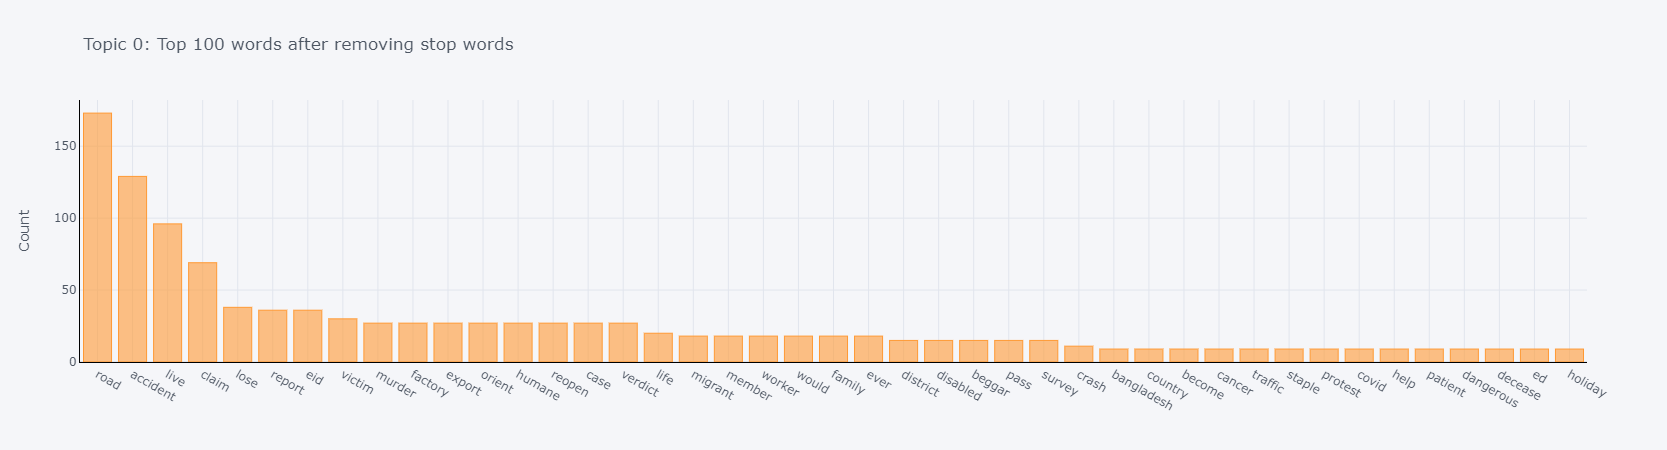

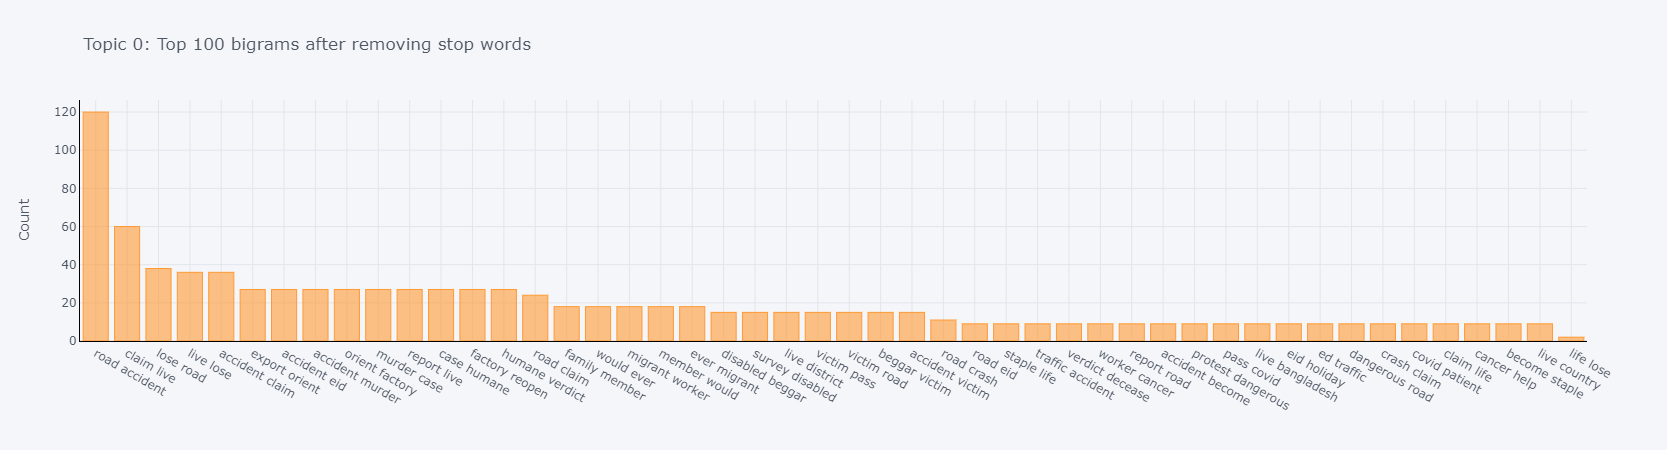

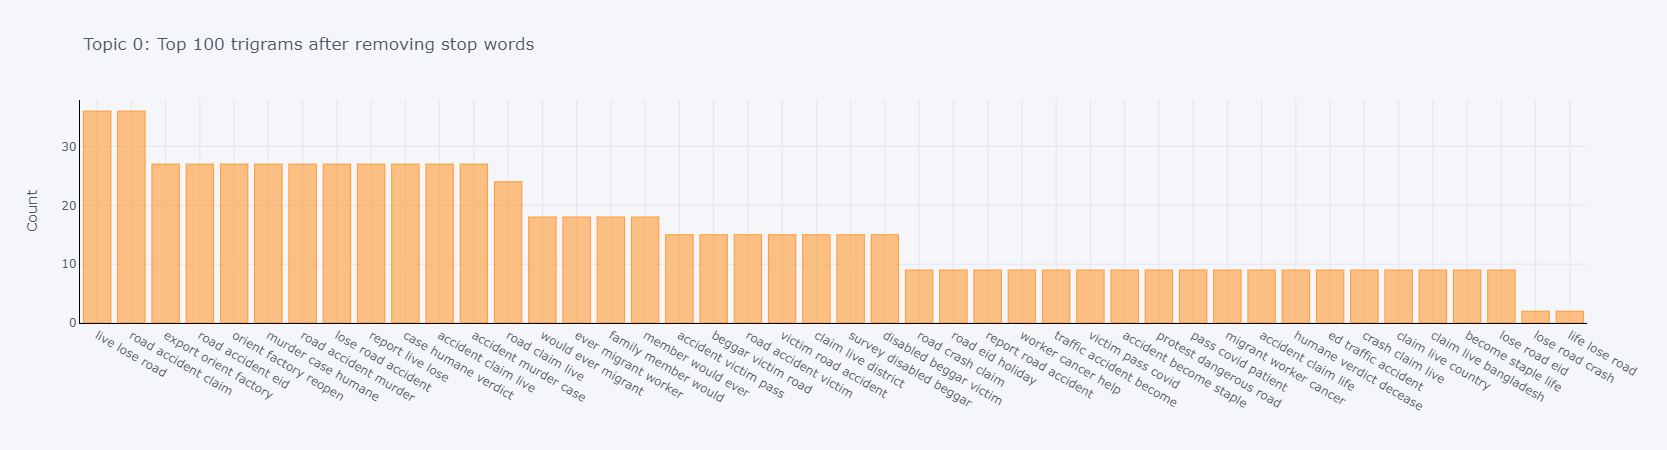

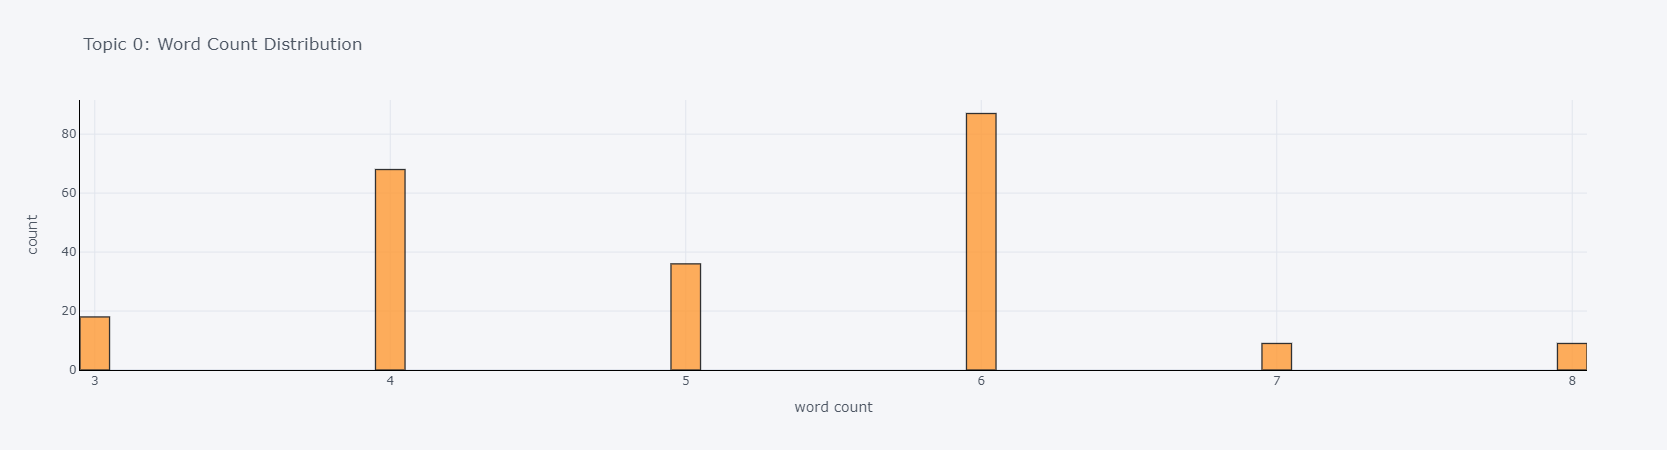

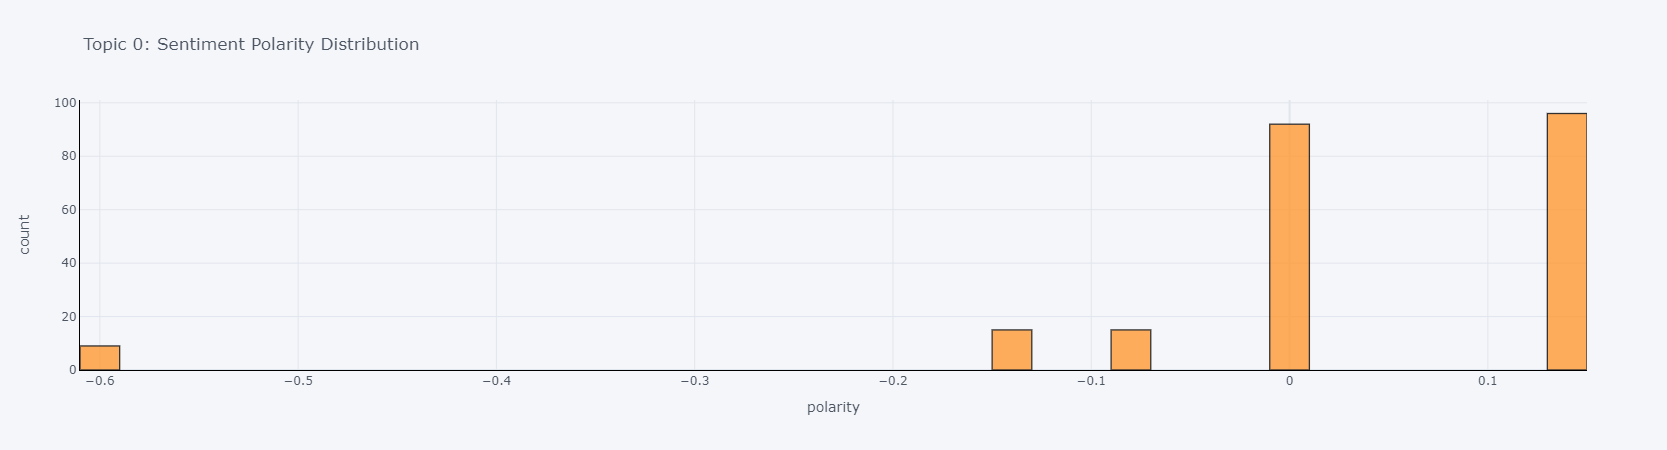

In [18]:
plot_model(lda, plot='wordcloud', topic_num = 'Topic 0')
plot_model(lda, plot='frequency', topic_num = 'Topic 0')
plot_model(lda, plot='bigram', topic_num = 'Topic 0')
plot_model(lda, plot='trigram', topic_num = 'Topic 0')
plot_model(lda, plot='distribution', topic_num = 'Topic 0')
plot_model(lda, plot='sentiment', topic_num = 'Topic 0')

### Topic 1

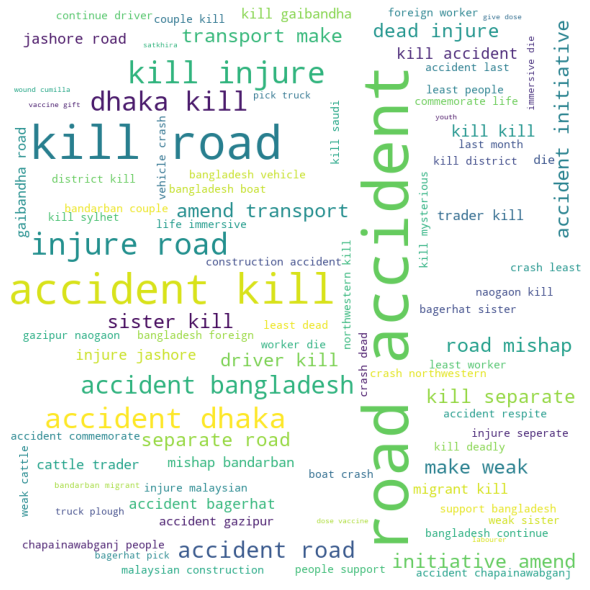

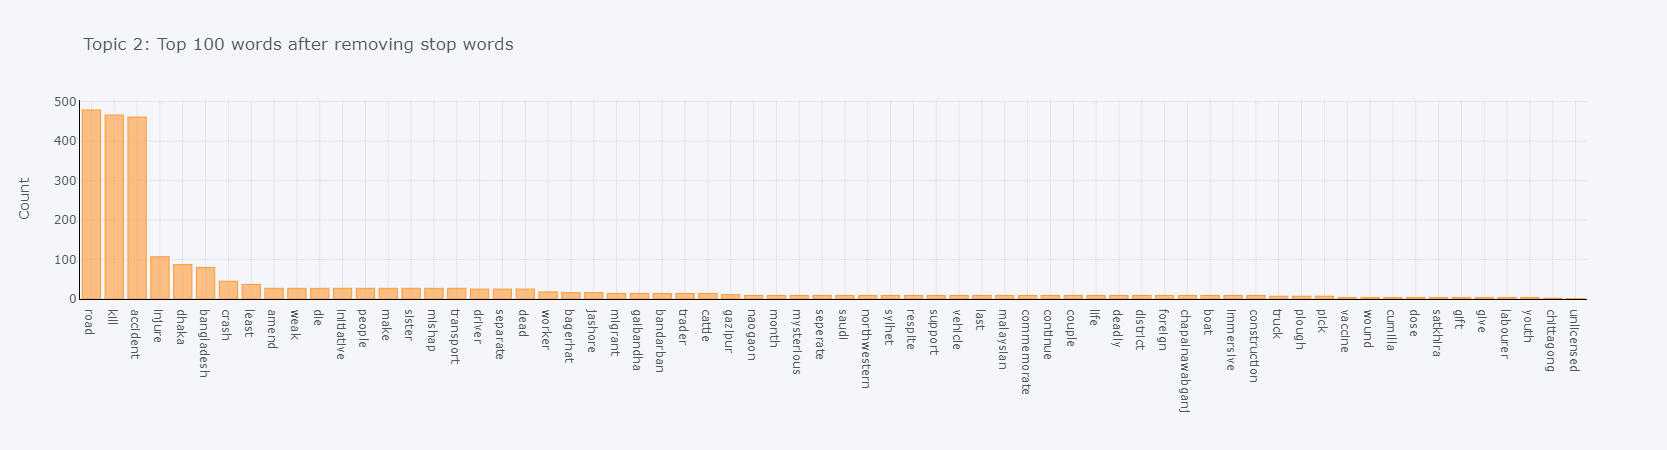

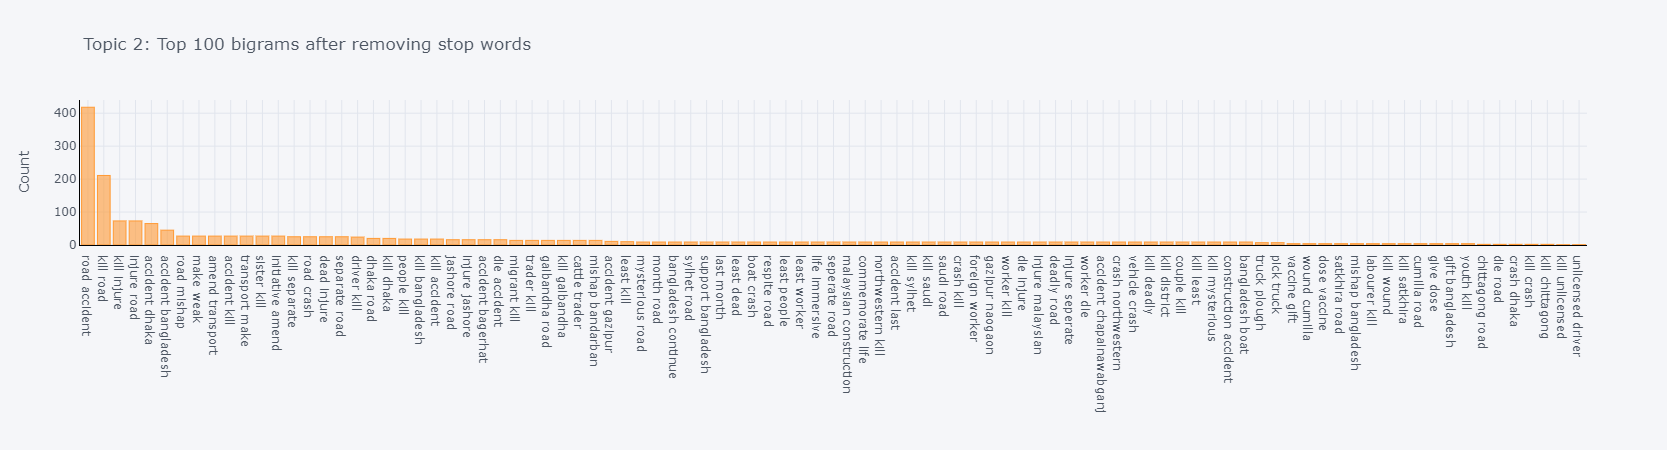

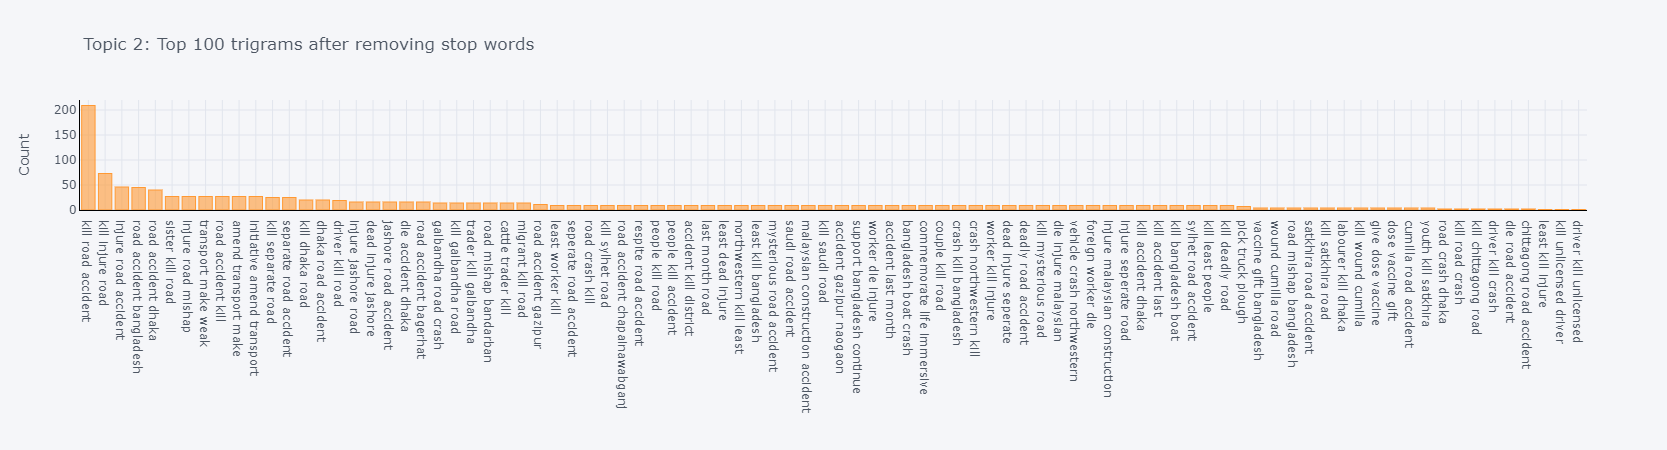

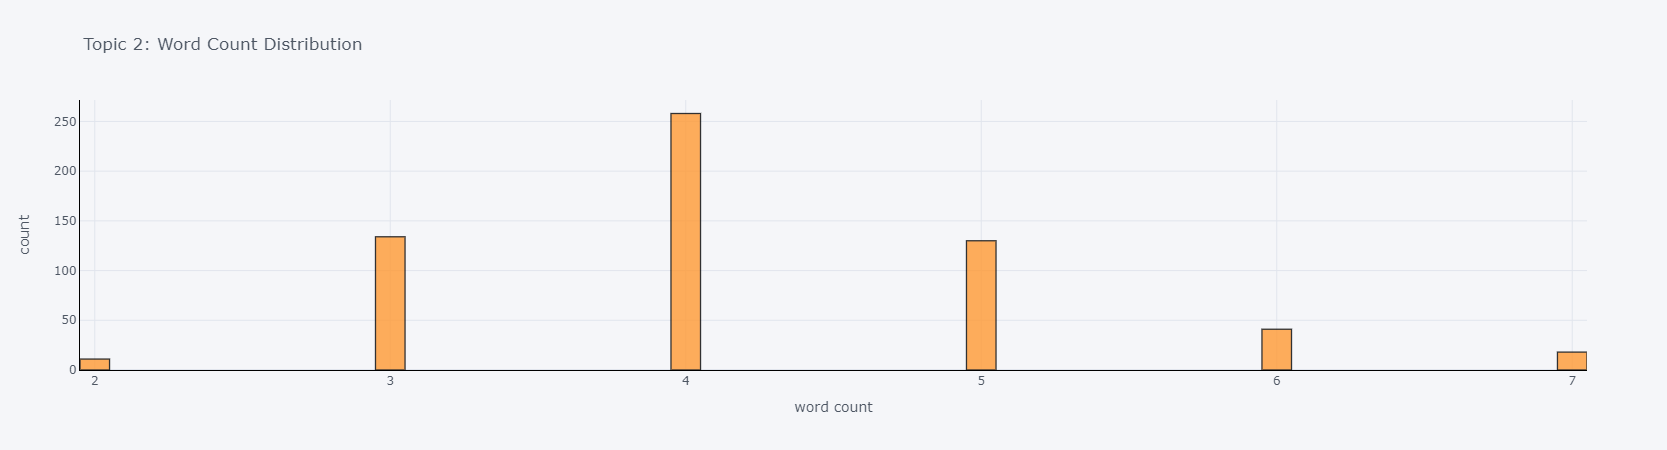

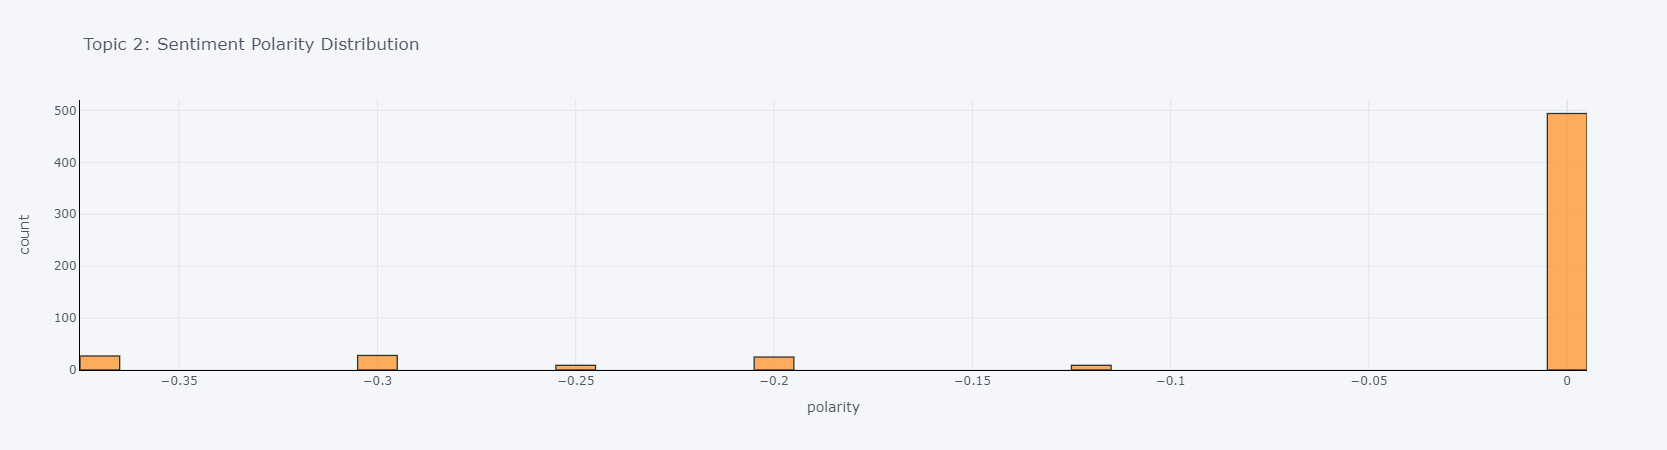

In [19]:
plot_model(lda, plot='wordcloud', topic_num = 'Topic 2')
plot_model(lda, plot='frequency', topic_num = 'Topic 2')
plot_model(lda, plot='bigram', topic_num = 'Topic 2')
plot_model(lda, plot='trigram', topic_num = 'Topic 2')
plot_model(lda, plot='distribution', topic_num = 'Topic 2')
plot_model(lda, plot='sentiment', topic_num = 'Topic 2')

References  http://www.pycaret.org/tutorials/html/NLP101.html